In [311]:
#Import libraries for data exploration
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample 
from sklearn.utils import compute_class_weight
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [312]:
#Read the data from the csv file into a pandas dataframe
loan_df = pd.read_csv('loans_full_schema.csv')

In [313]:
#Display the shape of the data
display("The shape of the data is: ", loan_df.shape)

'The shape of the data is: '

(10000, 55)

In [314]:
#display information about the columns
display("The columns in the data are: ", loan_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 55 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

'The columns in the data are: '

None

In [315]:
#Count the number of nulls for each column in the data
nulls = loan_df.isnull().sum()
display("The number of nulls for each column is: ", nulls)


'The number of nulls for each column is: '

emp_title                            833
emp_length                           817
state                                  0
homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
annual_income_joint                 8505
verification_income_joint           8545
debt_to_income_joint                8505
delinq_2y                              0
months_since_last_delinq            5658
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
months_since_90d_late               7715
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_

In [316]:
#check if any columns have duplicated values
loan_df[loan_df.duplicated()].shape[0]

0

In [317]:
#Print a list of columns with null values and the number of nulls in each column and the percentage of nulls in each column
null_columns = loan_df.columns[loan_df.isnull().any()]
null_columns_data = loan_df[null_columns].isnull().sum().to_frame(name="Null Count").merge(loan_df[null_columns].isnull().mean().to_frame(name="Null Percentage"), left_index=True, right_index=True)
null_df_sorted = null_columns_data.sort_values(by="Null Count", ascending=False)
display("The columns with null values and the number of nulls in each column and the percentage of nulls in each column are: ", null_df_sorted)

'The columns with null values and the number of nulls in each column and the percentage of nulls in each column are: '

,Null Count,Null Percentage
verification_income_joint,8545,0.8545
annual_income_joint,8505,0.8505
debt_to_income_joint,8505,0.8505
months_since_90d_late,7715,0.7715
months_since_last_delinq,5658,0.5658
months_since_last_credit_inquiry,1271,0.1271
emp_title,833,0.0833
emp_length,817,0.0817
num_accounts_120d_past_due,318,0.0318
debt_to_income,24,0.0024


In [318]:
#Create a list of the null columns with a Null Percentage greater than 0.5 and use that list to drop those columns from the loan_df dataframme while creating a new dataframe for risk analysis
null_columns_data = null_columns_data[null_columns_data["Null Percentage"] > 0.5]
null_columns_list = null_columns_data.index.tolist()
risk_df = loan_df.drop(columns=null_columns_list)
risk_df.shape

(10000, 50)

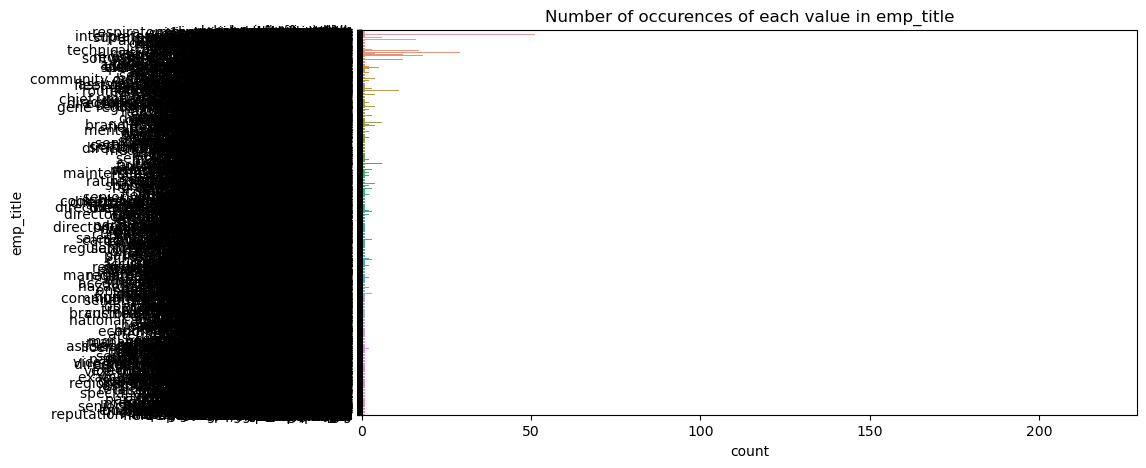

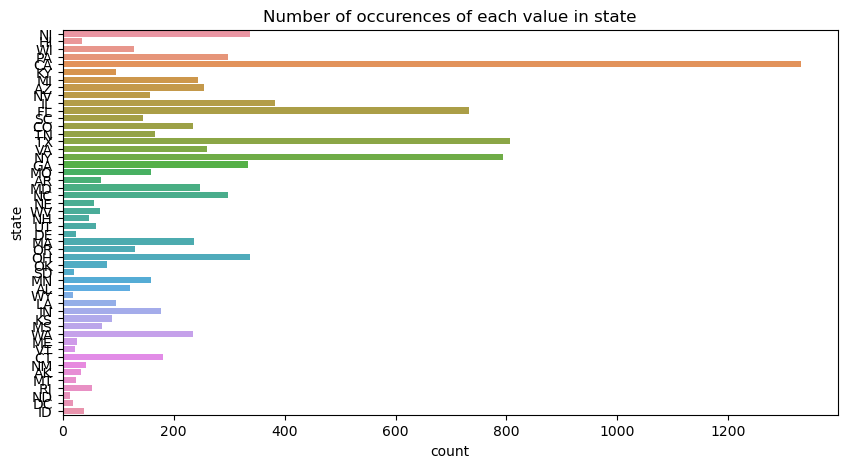

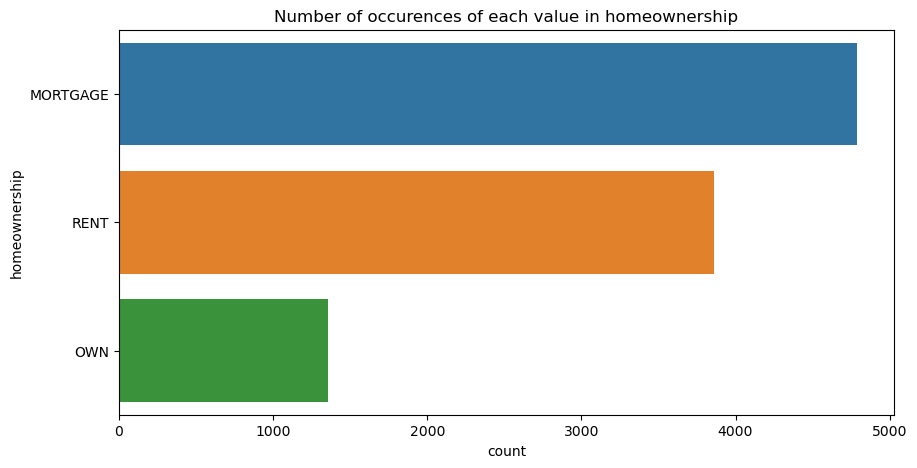

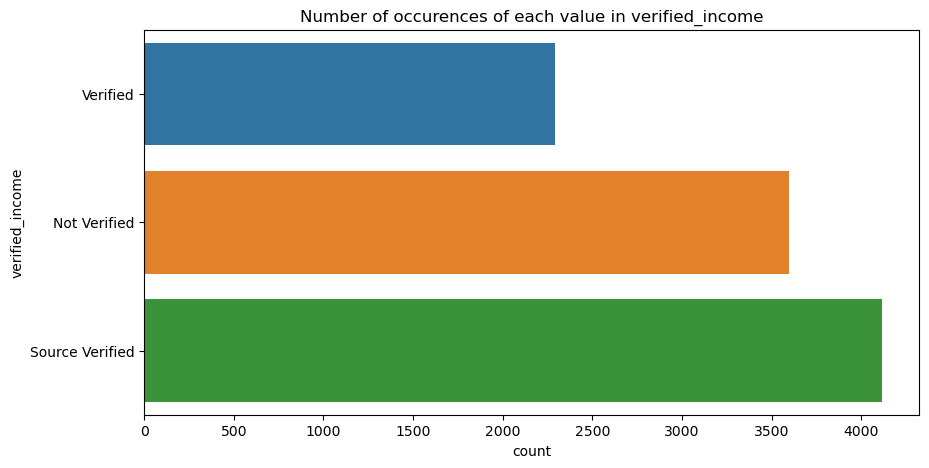

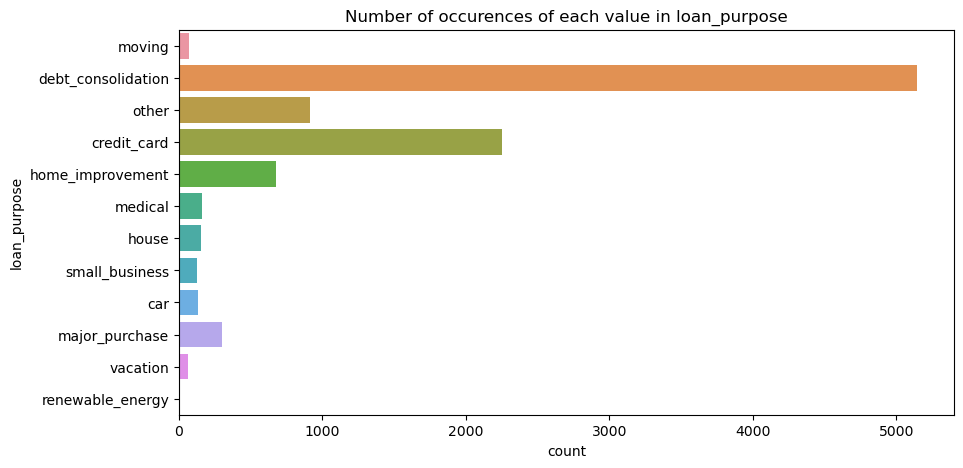

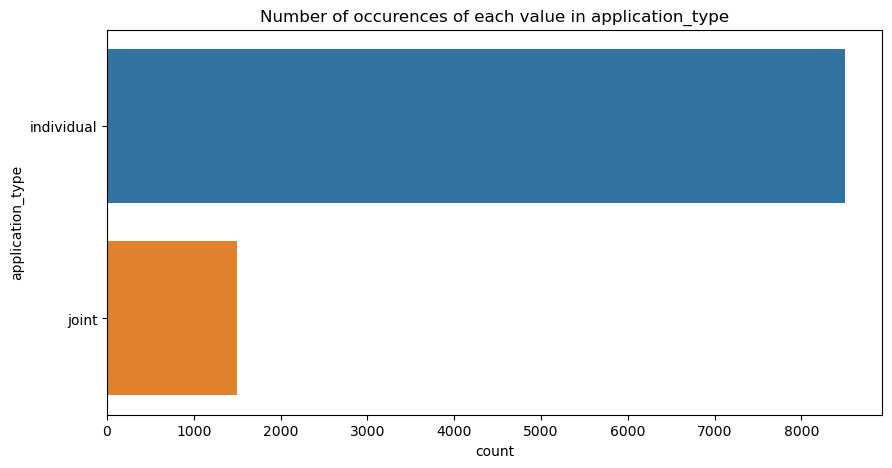

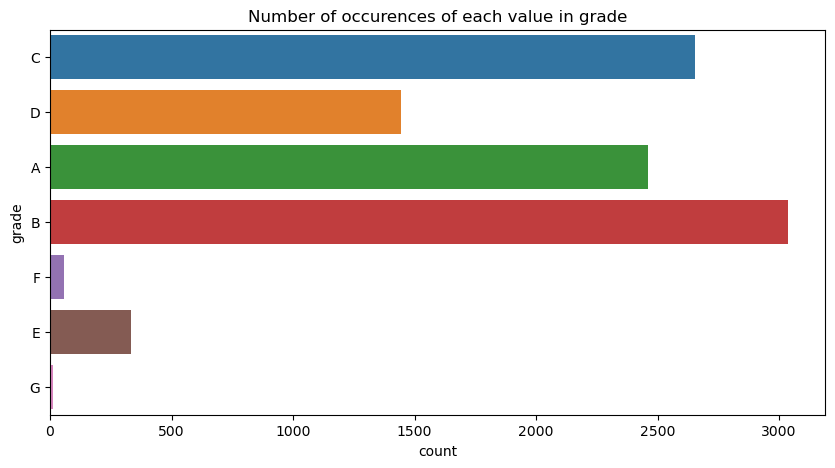

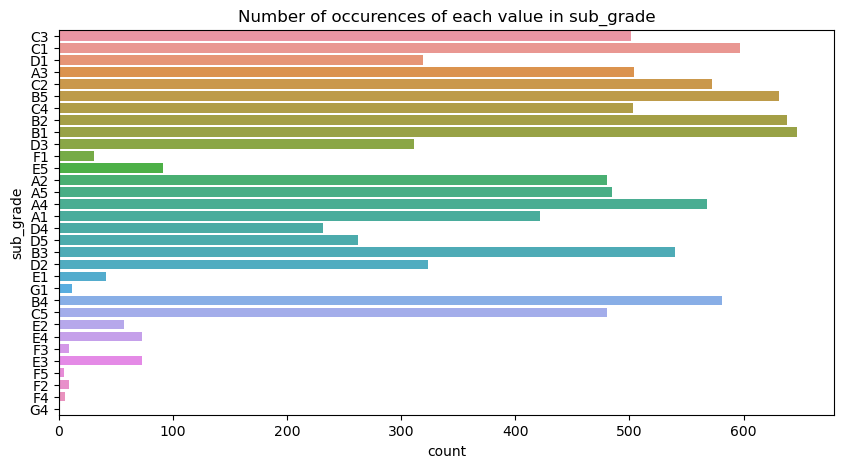

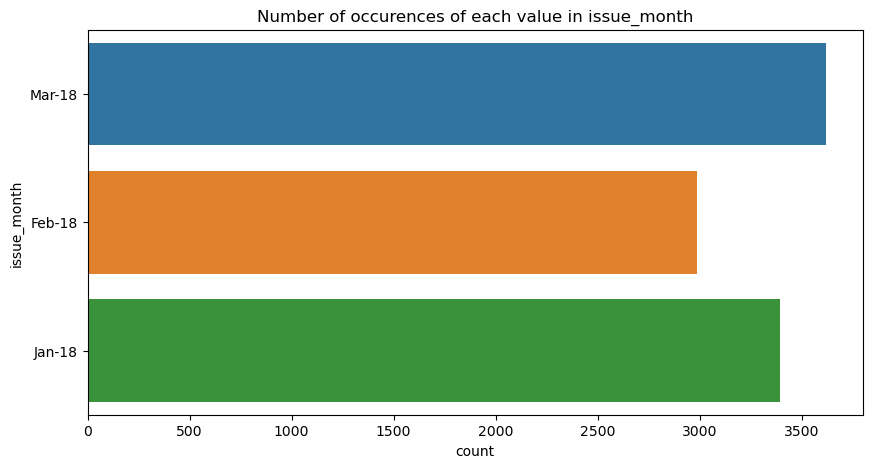

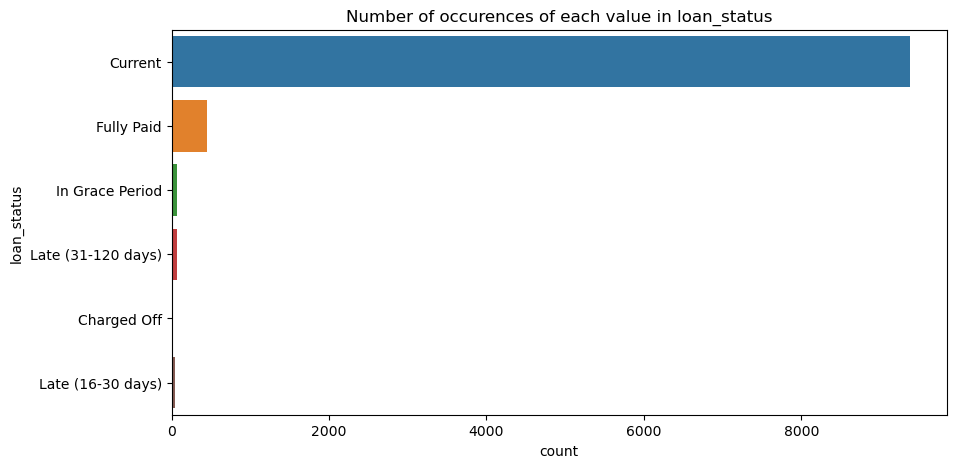

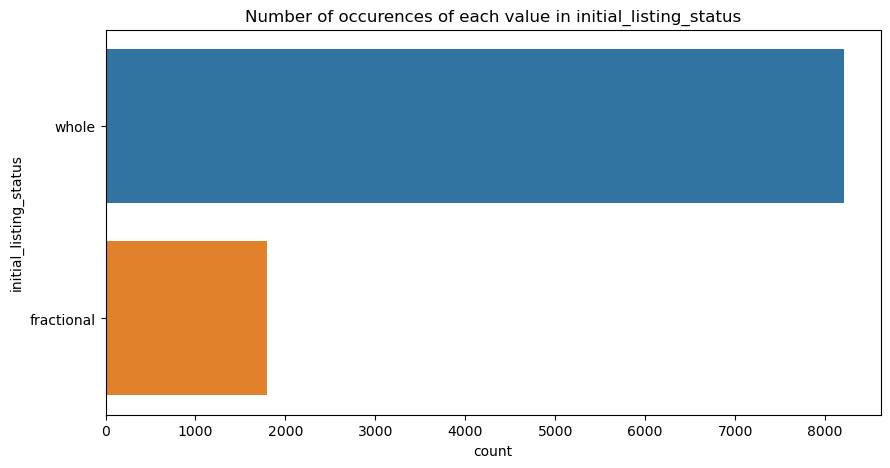

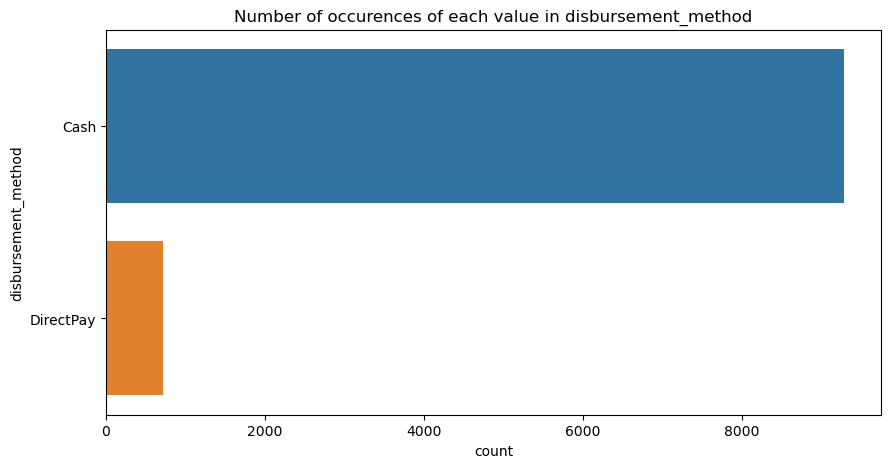

In [319]:
# plot the number of occurences of each value in each of the categorical columns
categorical_columns = risk_df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=risk_df, y=column)
    plt.title(f'Number of occurences of each value in {column}')
    plt.show()

In [320]:
# Drop the emp_title and state columns from the risk_df dataframe
risk_df = risk_df.drop(columns=['emp_title', 'state', 'emp_length'])

c:\Users\ryele\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


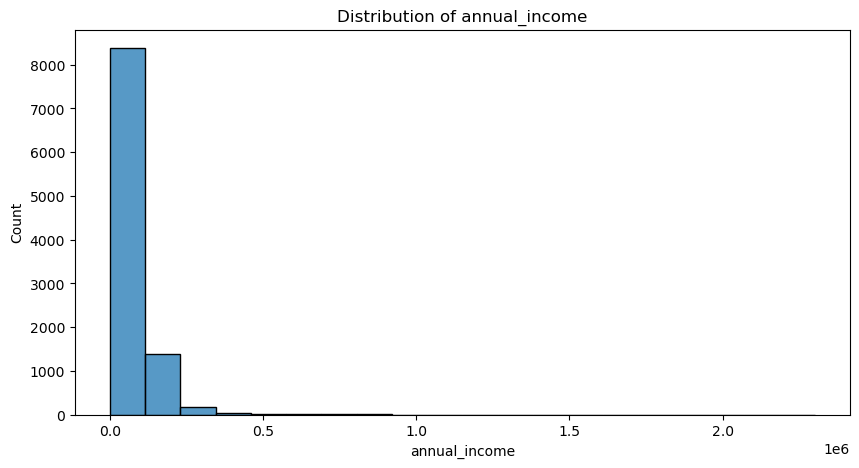

c:\Users\ryele\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


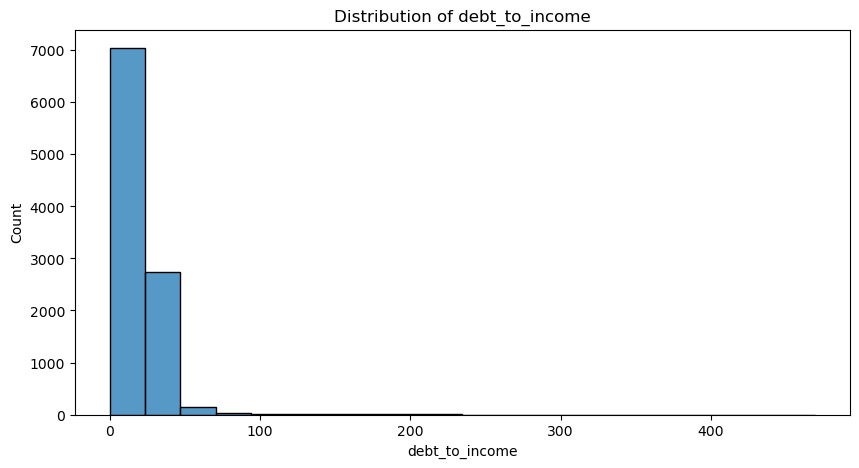

c:\Users\ryele\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


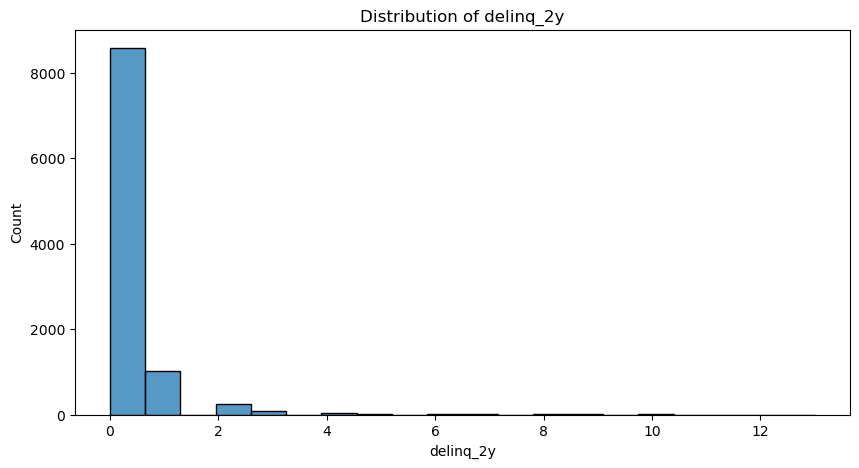

c:\Users\ryele\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


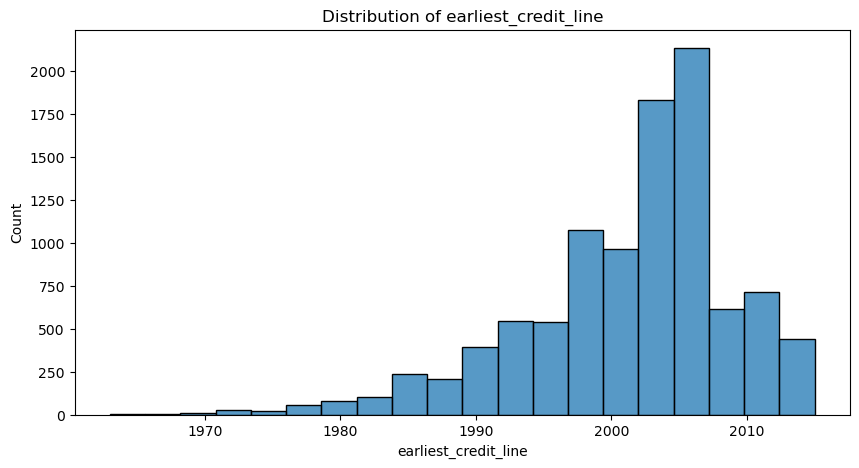

c:\Users\ryele\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


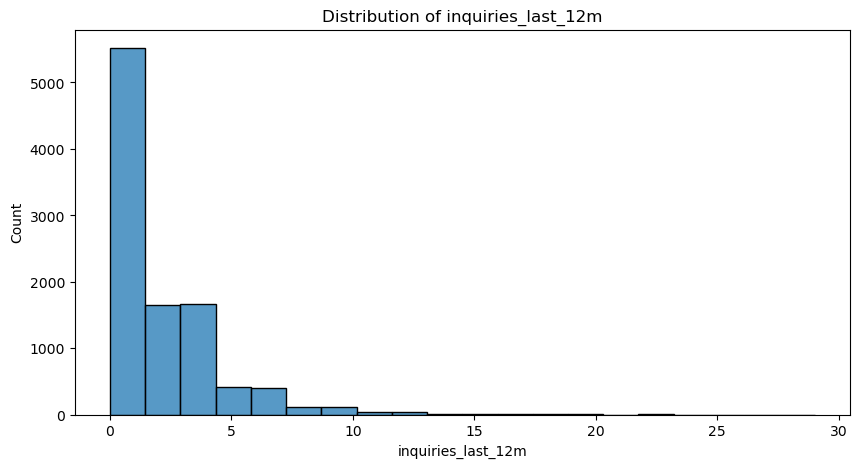

c:\Users\ryele\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


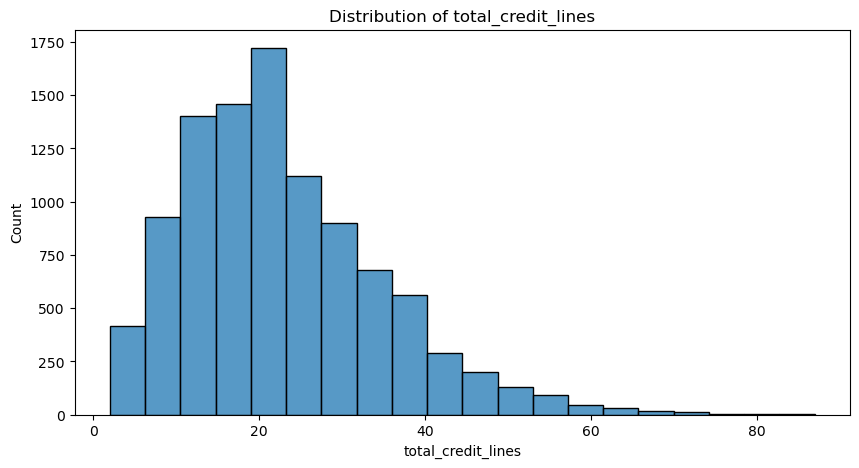

c:\Users\ryele\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


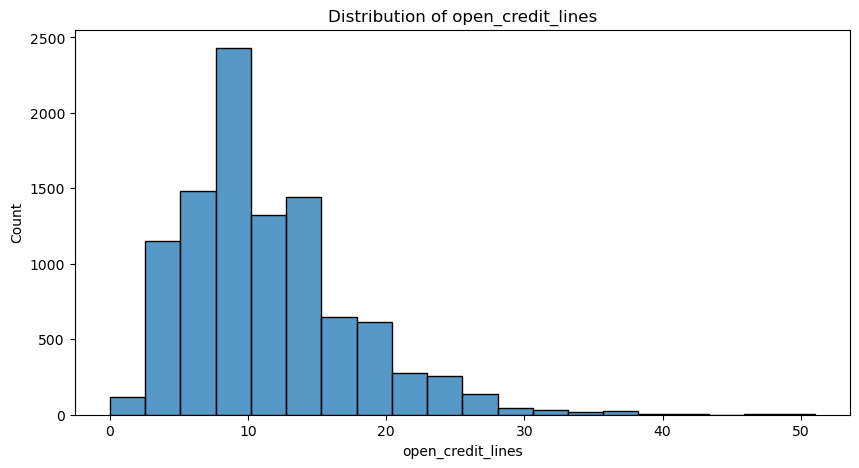

c:\Users\ryele\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


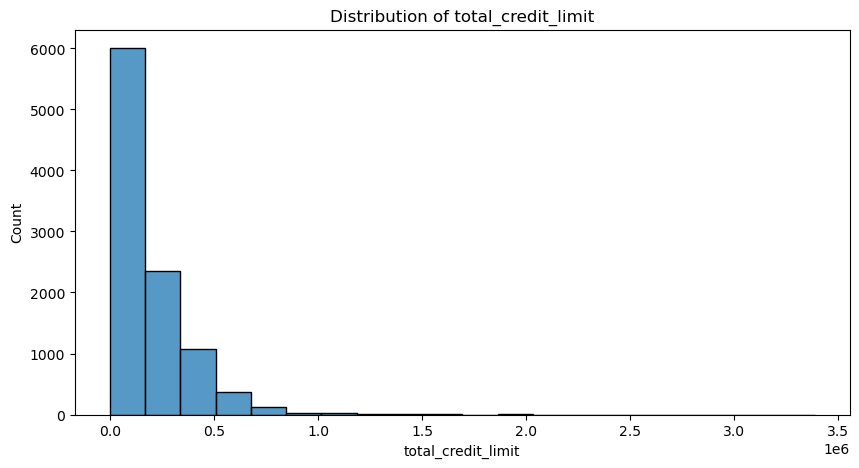

c:\Users\ryele\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


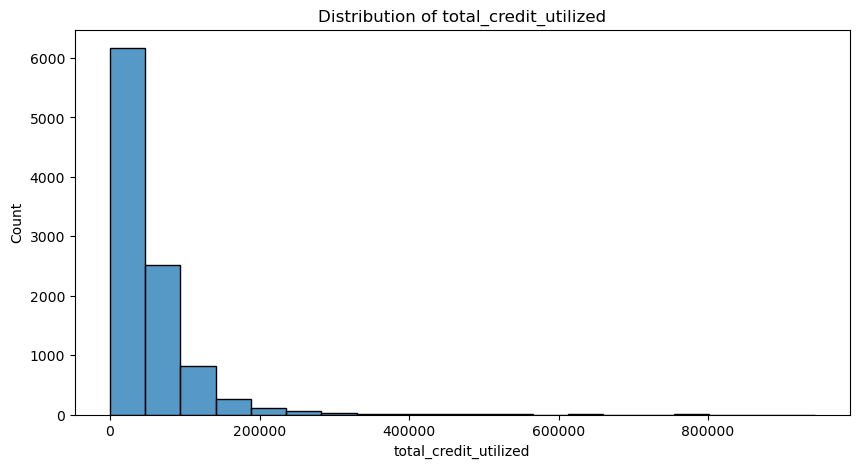

c:\Users\ryele\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


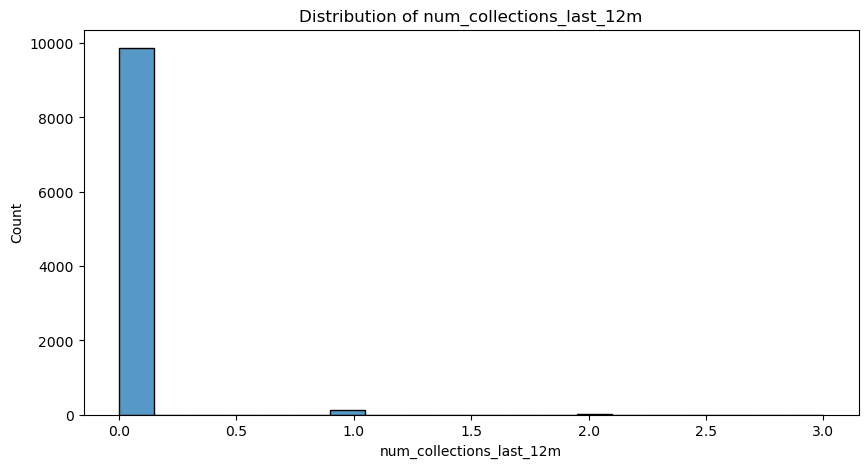

c:\Users\ryele\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


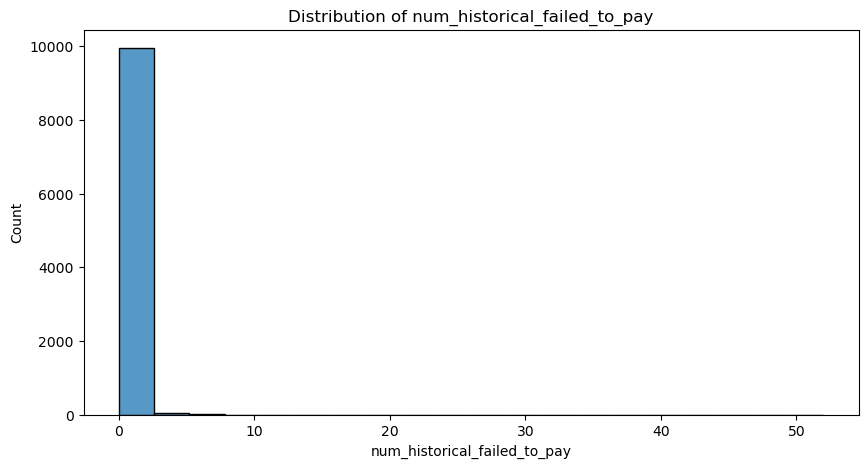

c:\Users\ryele\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


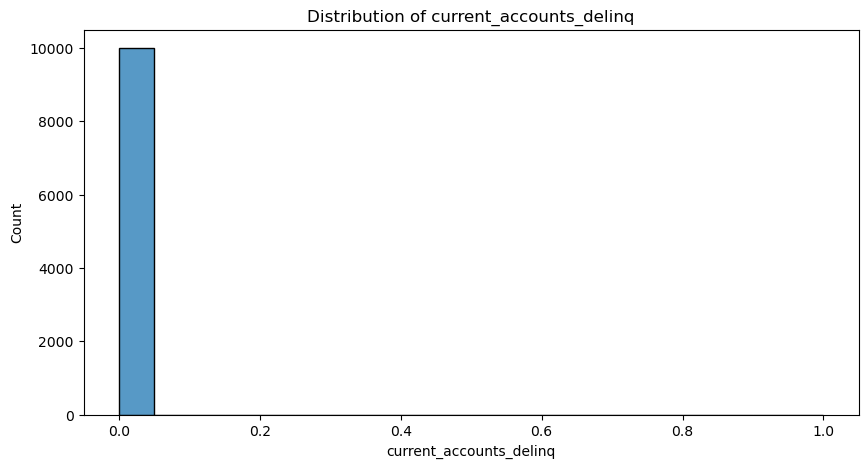

c:\Users\ryele\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


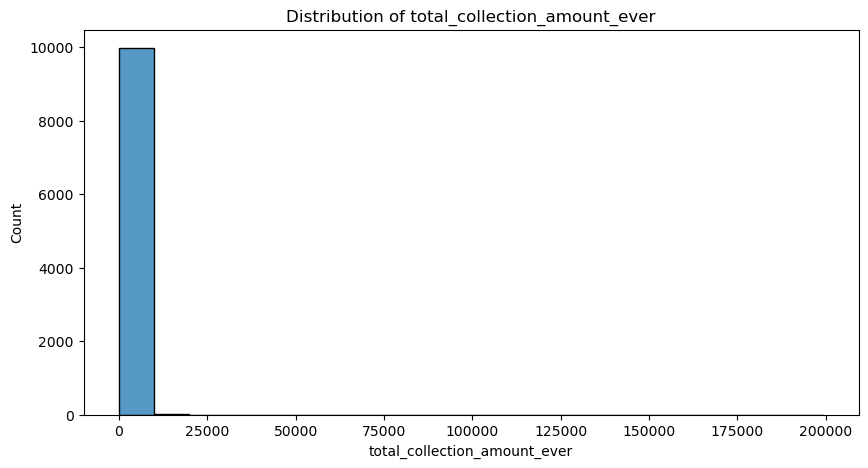

c:\Users\ryele\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


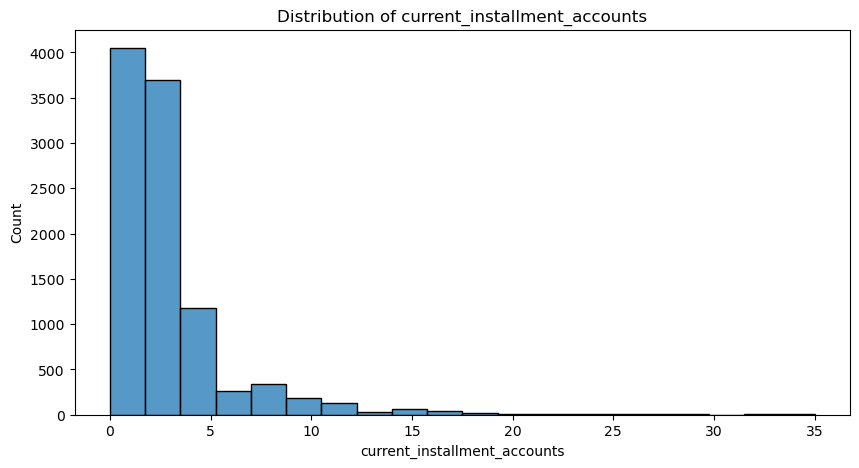

c:\Users\ryele\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


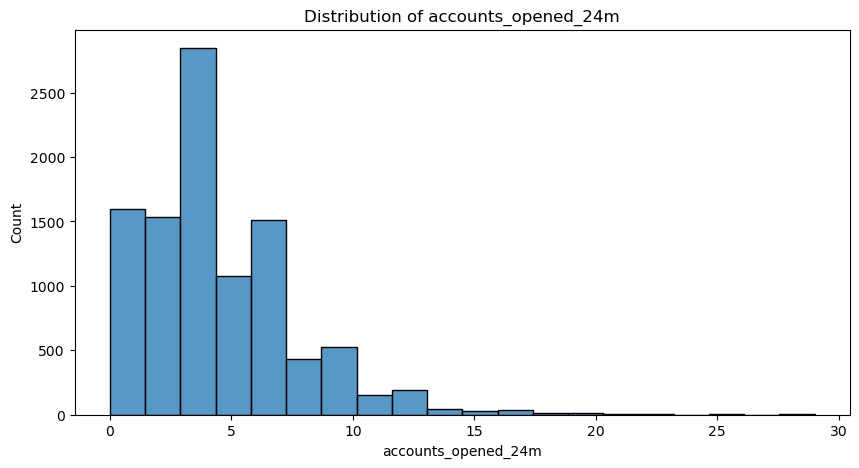

c:\Users\ryele\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


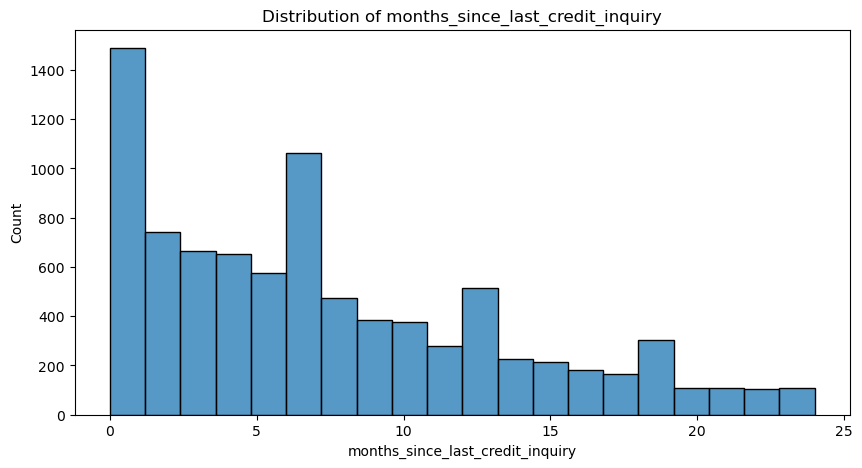

c:\Users\ryele\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


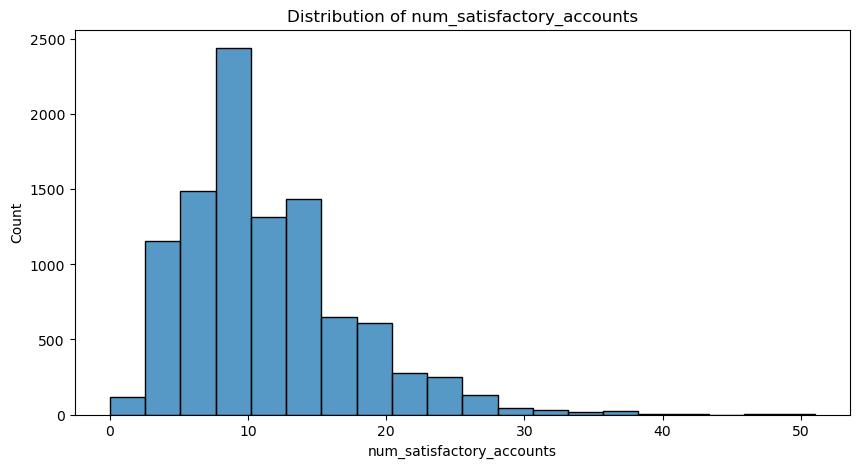

c:\Users\ryele\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


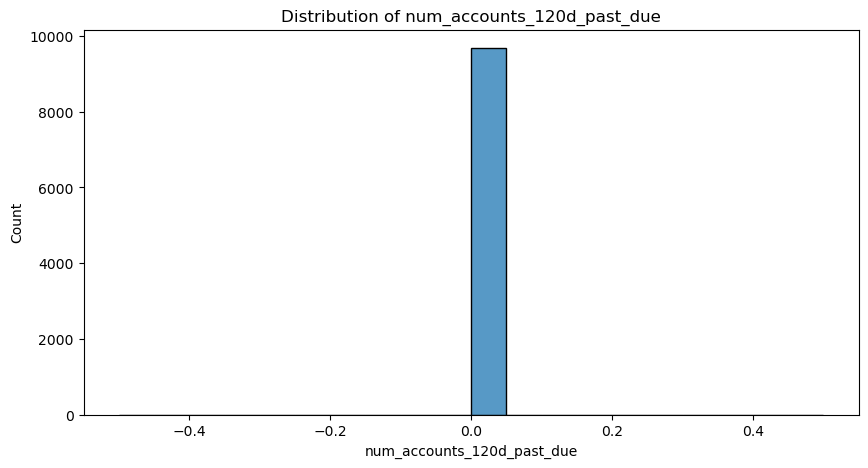

c:\Users\ryele\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


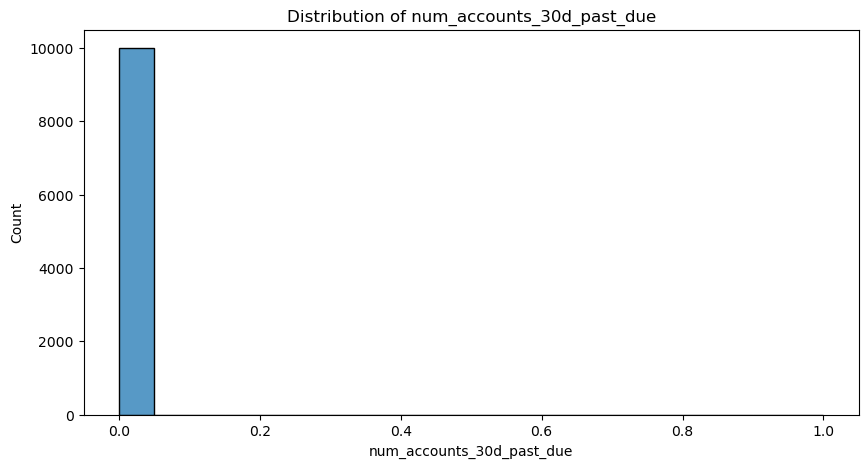

c:\Users\ryele\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


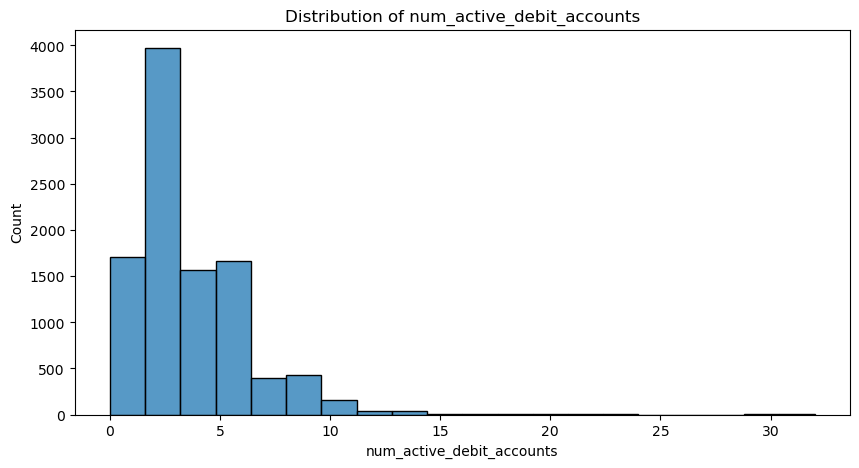

c:\Users\ryele\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


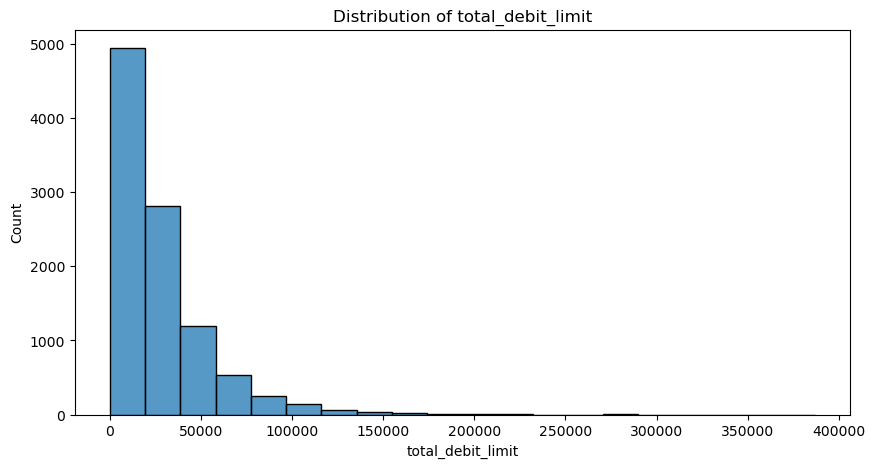

c:\Users\ryele\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


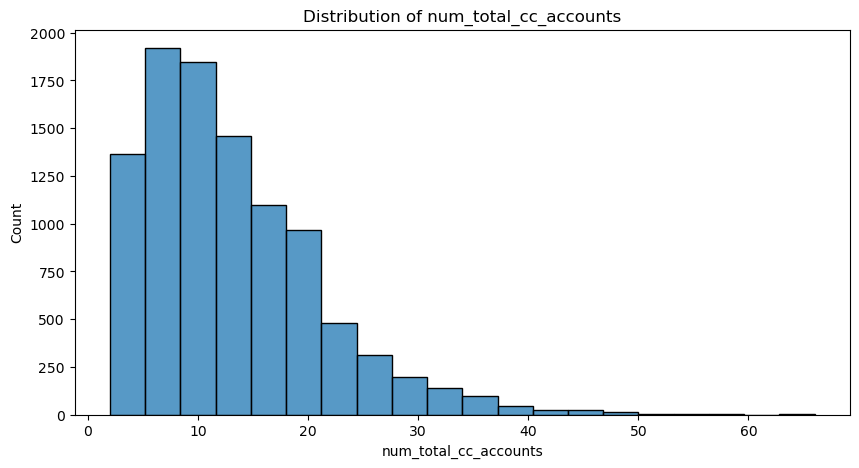

c:\Users\ryele\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


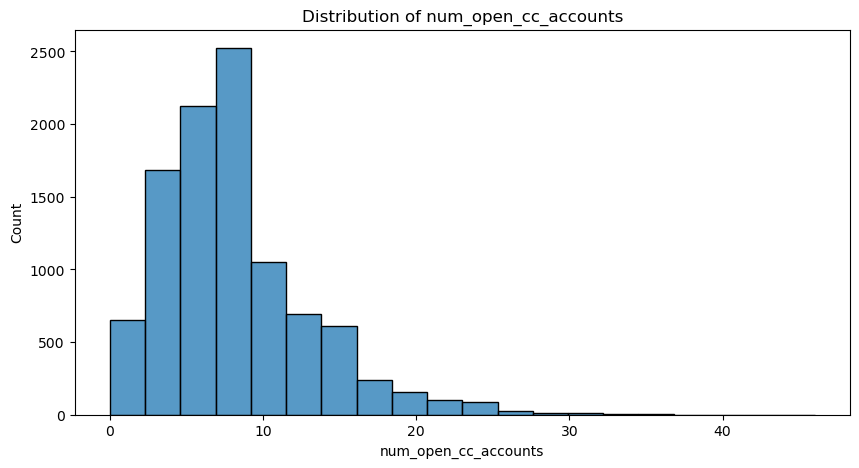

c:\Users\ryele\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


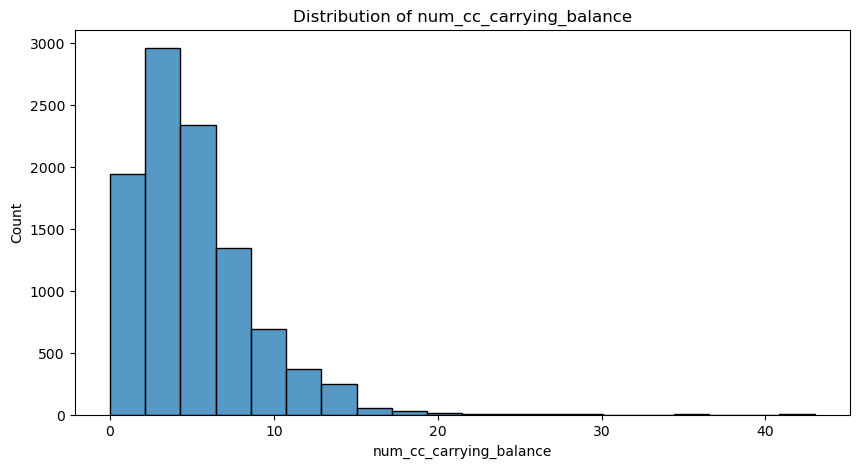

c:\Users\ryele\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


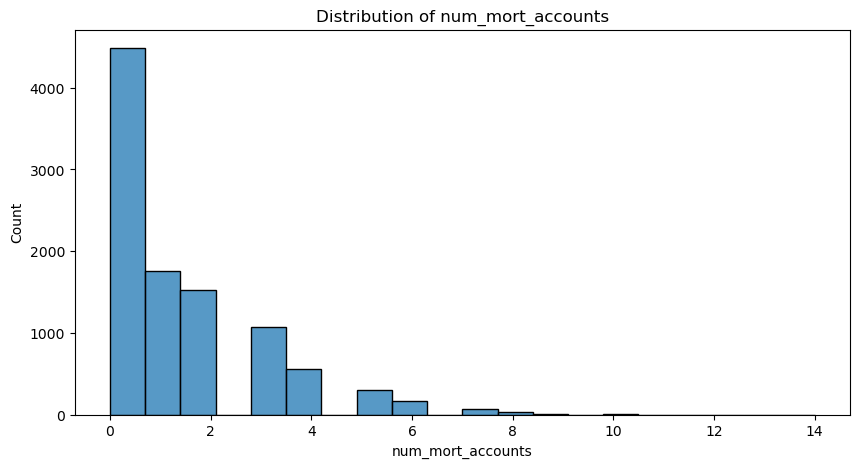

c:\Users\ryele\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


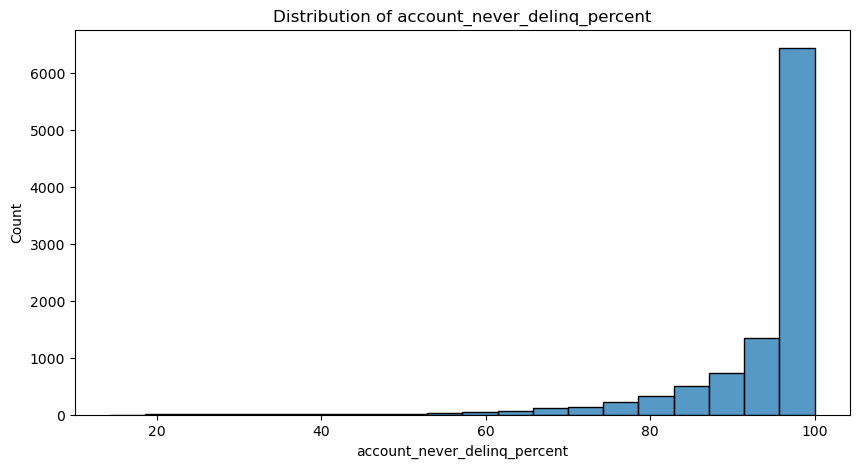

c:\Users\ryele\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


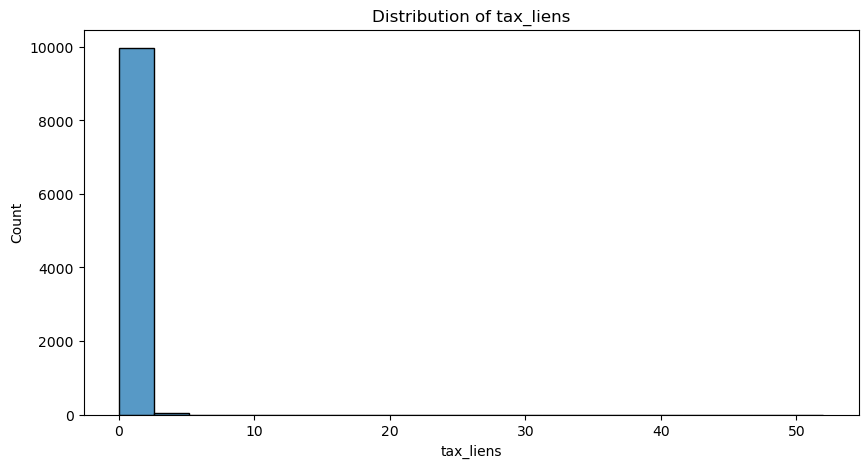

c:\Users\ryele\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


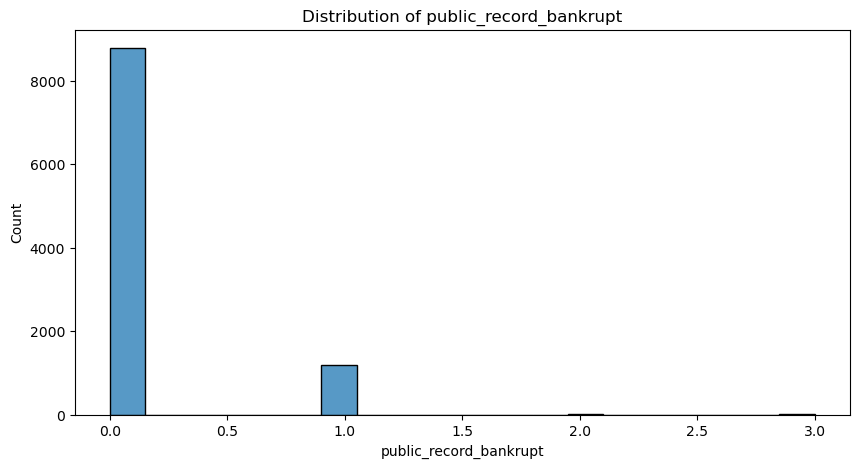

c:\Users\ryele\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


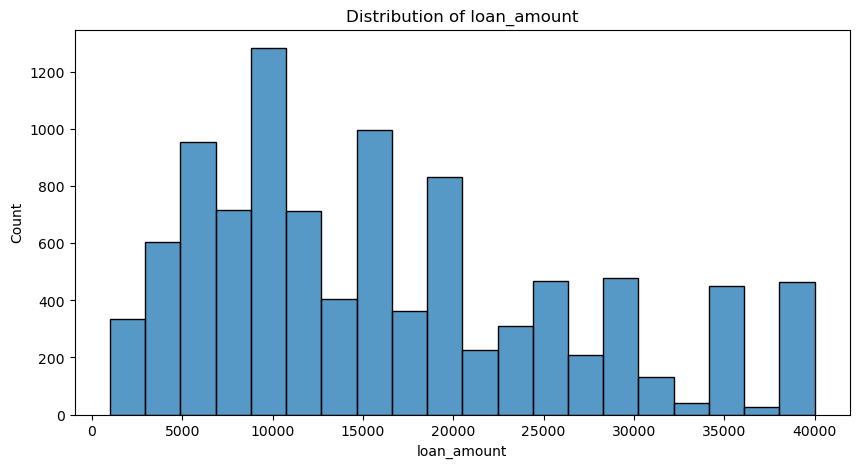

c:\Users\ryele\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


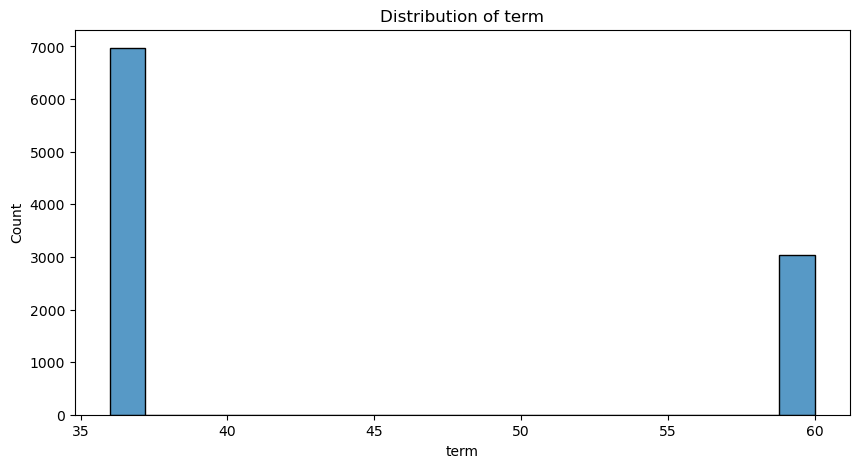

c:\Users\ryele\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


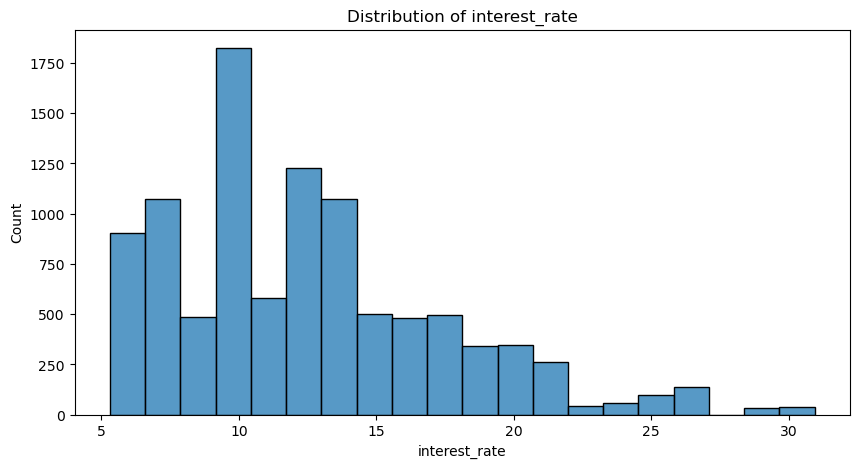

c:\Users\ryele\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


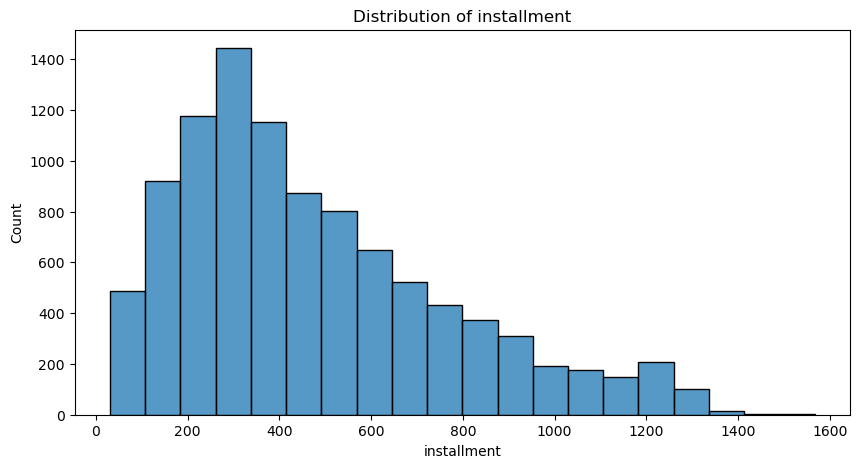

c:\Users\ryele\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


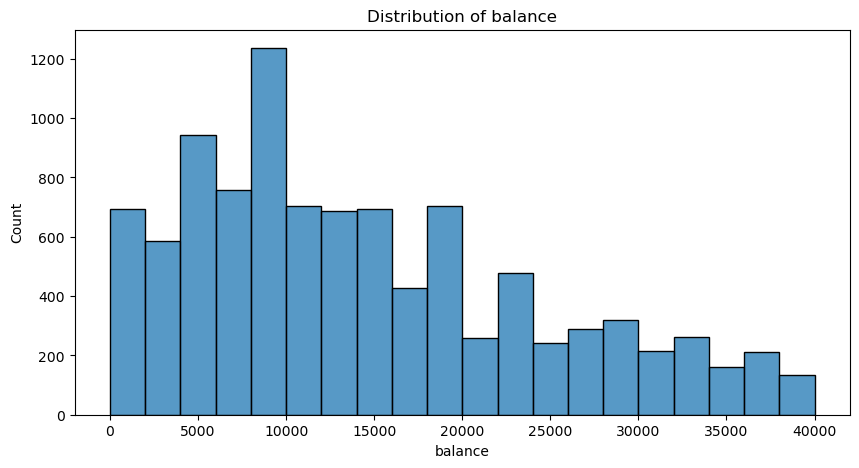

c:\Users\ryele\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


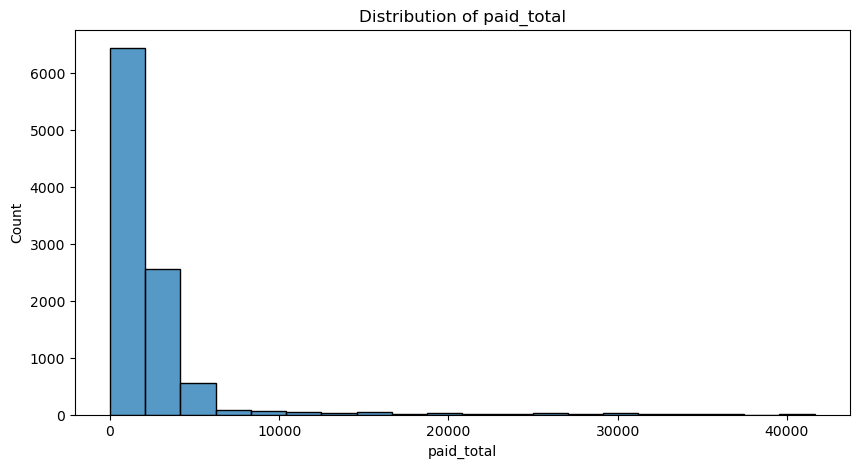

c:\Users\ryele\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


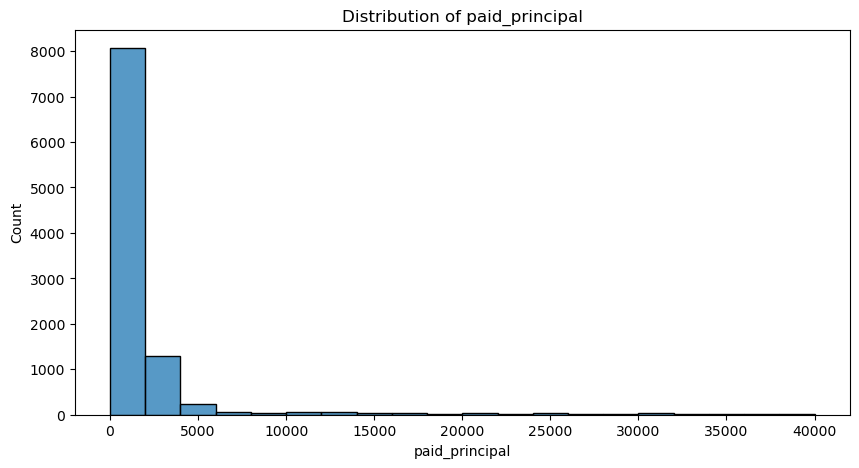

c:\Users\ryele\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


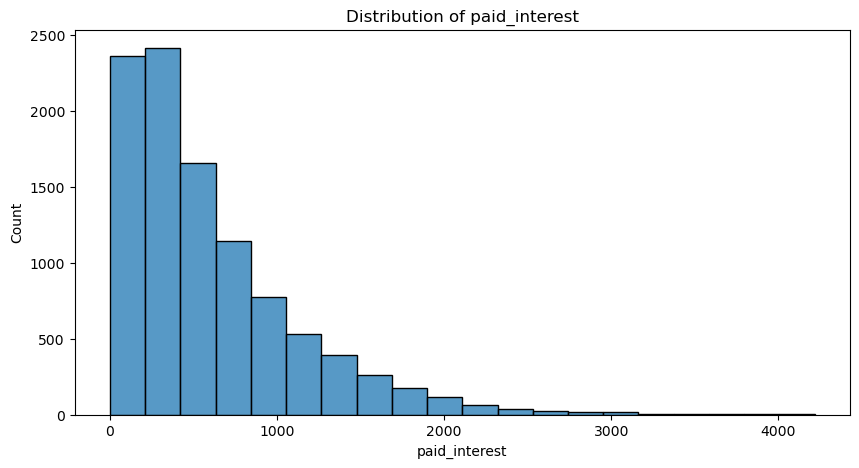

c:\Users\ryele\anaconda3\envs\mlenv\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


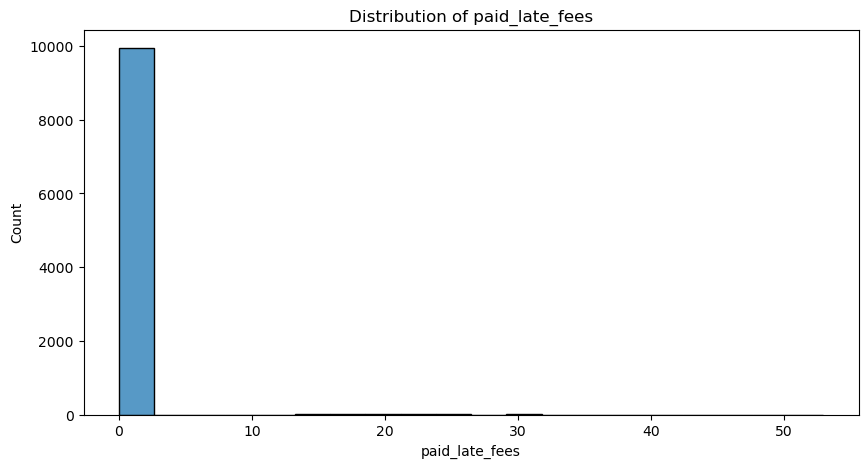

In [321]:
#Create histogram plots for all the numeric variables to see the distribution of the data
numeric_columns = risk_df.select_dtypes(include=['int64', 'float64']).columns
for column in numeric_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=risk_df, x=column, bins=20)
    plt.title(f'Distribution of {column}')
    plt.show()

In [322]:
# Create a target column called Risk Category based on the loan_status column. values "Current" and "Fully Paid" are considered low risk (assigned a value of 0) and all other values are considered high risk (assigned a value of 1)
for i in range(risk_df.shape[0]):
    if risk_df.loc[i, 'loan_status'] == 'Current' or risk_df.loc[i, 'loan_status'] == 'Fully Paid':
        risk_df.loc[i, 'risk_category'] = 0
    else:
        risk_df.loc[i, 'risk_category'] = 1

In [323]:
display(risk_df['risk_category'].value_counts())

risk_category
0.0    9822
1.0     178
Name: count, dtype: int64

In [324]:
#Separate the target column from the rest of the data
X = risk_df.drop(columns=['loan_status', 'risk_category'])
y = risk_df['risk_category']

X.shape, y.shape

((10000, 46), (10000,))

In [325]:
#Repopulate the numeric_columns list
numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
#Use scikit learn's StandardScaler to standardize the values of the numeric columns in the x dataframe
scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])


#combine the x and y dataframes into a single dataframe for the model
model_df = pd.concat([X, y], axis=1)

display(model_df['risk_category'].value_counts())
display(model_df.head())    

risk_category
0.0    9822
1.0     178
Name: count, dtype: int64

,homeownership,annual_income,verified_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,...,sub_grade,issue_month,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees,risk_category
0,MORTGAGE,0.166502,Verified,-0.086522,-0.315962,-0.037203,1.698227,0.447663,-0.239333,-0.601264,...,C3,Mar-18,whole,Cash,1.260223,-0.125038,-0.234361,0.803250,-0.065908,0.0
1,RENT,-0.605925,Not Verified,-0.950953,-0.315962,-0.678630,-0.402603,0.615944,0.442332,-0.825091,...,C1,Feb-18,whole,Cash,-0.984292,-0.504067,-0.397975,-0.868306,-0.065908,0.0
2,RENT,-0.605925,Source Verified,0.122754,-0.315962,0.604224,0.857895,0.700085,-0.239333,-0.849645,...,D1,Feb-18,fractional,Cash,-1.267985,-0.558973,-0.442581,-0.953479,-0.065908,0.0
3,RENT,-0.760410,Not Verified,-0.609713,-0.315962,0.732510,-0.822769,-1.571716,-1.261830,-0.843212,...,A3,Jan-18,whole,Cash,0.441019,0.206834,0.219425,-0.064791,-0.065908,0.0
4,RENT,-0.683167,Verified,2.576083,-0.315962,0.860795,2.118393,-0.057182,0.783165,-0.606360,...,C3,Mar-18,whole,Cash,0.699638,-0.042846,-0.083569,0.299889,-0.065908,0.0


In [326]:
#Check for nulls/NaNs in the risk_df dataframe
nulls = model_df.isnull().sum()
display("The number of nulls for each column is: ", nulls)

'The number of nulls for each column is: '

homeownership                          0
annual_income                          0
verified_income                        0
debt_to_income                        24
delinq_2y                              0
earliest_credit_line                   0
inquiries_last_12m                     0
total_credit_lines                     0
open_credit_lines                      0
total_credit_limit                     0
total_credit_utilized                  0
num_collections_last_12m               0
num_historical_failed_to_pay           0
current_accounts_delinq                0
total_collection_amount_ever           0
current_installment_accounts           0
accounts_opened_24m                    0
months_since_last_credit_inquiry    1271
num_satisfactory_accounts              0
num_accounts_120d_past_due           318
num_accounts_30d_past_due              0
num_active_debit_accounts              0
total_debit_limit                      0
num_total_cc_accounts                  0
num_open_cc_acco

In [327]:
#Compute the class weights for the risk_category column in the risk_df dataframe
class_weights = compute_class_weight('balanced', classes=np.unique(model_df['risk_category']), y=model_df['risk_category'])
class_weights_dict = {0: class_weights[0], 1: class_weights[1]}
display("The class weights for the risk_category column are: ", class_weights_dict)

'The class weights for the risk_category column are: '

{0: 0.509061290979434, 1: 28.089887640449437}

In [333]:
#Create a list of the categorical variables in the model_df dataframe
categorical_columns = model_df.select_dtypes(include=['object']).columns

#Use onehot encoding to encode the categorical columns in the model_df dataframe 
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
onehot_encoded = onehot_encoder.fit_transform(model_df[categorical_columns])
onehot_encoded_df = pd.DataFrame(onehot_encoded, columns=onehot_encoder.get_feature_names_out(categorical_columns))
model_df = pd.concat([model_df, onehot_encoded_df], axis=1)
model_df = model_df.drop(columns=categorical_columns)
model_df.shape


c:\Users\ryele\anaconda3\envs\mlenv\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(10000, 95)

In [328]:
#Balance the dataset

# Separate majority and minority classes
#majority_class = model_df[model_df['risk_category'] == 0]
#minority_class = model_df[model_df['risk_category'] == 1]
# Upsample minority class
#minority_class_upsampled = resample(minority_class,
                                   replace=True,     # sample with replacement
                                   n_samples=len(majority_class),    # to match majority class
                                   random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
#df_upsampled = pd.concat([majority_class, minority_class_upsampled])
# Splitting the data into features (X) and target (y)
#X = df_upsampled.drop('risk_category', axis=1)
#y = df_upsampled['risk_category']



In [347]:
#Drop nulls from model_df
model_df = model_df.dropna()

In [352]:
#Scale the model_df dataframe
scaler = StandardScaler()
model_df[numeric_columns] = scaler.fit_transform(model_df[numeric_columns])


In [353]:
#Split the data into training and testing sets
X = model_df.drop(columns=['risk_category'])
y = model_df['risk_category']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=8)

In [354]:
#Check for missing, null or NaN values in the training and testing sets
nulls = X.isnull().sum()
display("The number of nulls for each column in the training set is: ", nulls)

'The number of nulls for each column in the training set is: '

annual_income                    0
debt_to_income                   0
delinq_2y                        0
earliest_credit_line             0
inquiries_last_12m               0
                                ..
sub_grade_G4                     0
issue_month_Jan-18               0
issue_month_Mar-18               0
initial_listing_status_whole     0
disbursement_method_DirectPay    0
Length: 94, dtype: int64

In [341]:
#Treat all the nulls in the columns in the training set using the SimpleImputer
#imputer = SimpleImputer(strategy='mean')
#X_train_imputed = imputer.fit_transform(X)


In [342]:
#Check for missing, null or NaN values in the x_train_imputed dataframe
#nulls = pd.DataFrame(X_train_imputed).isnull().sum()
#display("The number of nulls for each column in the training set after imputation is: ", nulls)

'The number of nulls for each column in the training set after imputation is: '

0     0
1     0
2     0
3     0
4     0
     ..
89    0
90    0
91    0
92    0
93    0
Length: 94, dtype: int64

In [355]:

#Train a logistic regression model on the training data
model = LogisticRegression()
model.fit(X_train, y_train)


c:\Users\ryele\anaconda3\envs\mlenv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [356]:
#Use the trained model to predict the risk category of the testing data
y_pred = model.predict(X_test)


In [360]:
#Evaluate the performance of the model using the classification report and confusion matrix and balanced accuracy score
from sklearn.metrics import classification_report, confusion_matrix
classification_report_output = classification_report(y_test, y_pred)
confusion_matrix_output = confusion_matrix(y_test, y_pred)
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score_output = balanced_accuracy_score(y_test, y_pred)
display("The classification report is: ", classification_report_output)
display("The confusion matrix is: ", confusion_matrix_output)
display("The balanced accuracy score is: ", balanced_accuracy_score_output)


'The classification report is: '

'              precision    recall  f1-score   support\n\n         0.0       0.98      1.00      0.99      1643\n         1.0       0.88      0.19      0.31        37\n\n    accuracy                           0.98      1680\n   macro avg       0.93      0.59      0.65      1680\nweighted avg       0.98      0.98      0.98      1680\n'

'The confusion matrix is: '

array([[1642,    1],
       [  30,    7]], dtype=int64)

'The balanced accuracy score is: '

0.5942902732312348